In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
penguins = sns.load_dataset("penguins").dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Linear Regression

**Task**:Predicting `flipper_length_mm` using `bill_length_mm`, `bill_depth_mm`, `species`, and `sex`

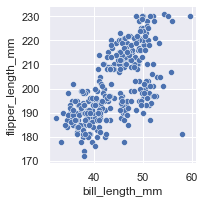

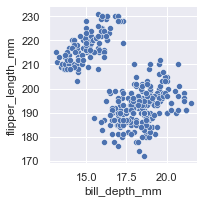

In [3]:
sns.relplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", height=3)
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3)

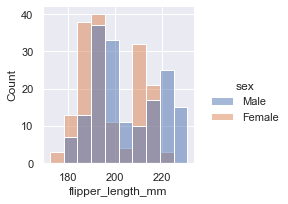

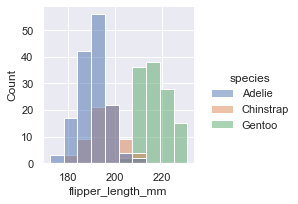

In [4]:
sns.displot(data=penguins, x="flipper_length_mm", hue = "sex", height=3)
sns.displot(data=penguins, x="flipper_length_mm", hue = "species", height=3)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [6]:
# creating data and target
target = penguins["flipper_length_mm"].values

categorical = OneHotEncoder().fit_transform(penguins[["species", "sex"]]).toarray() # process categorical data
print(categorical)
data = np.append(categorical, penguins[["bill_length_mm", "bill_depth_mm"]].values, axis = 1)

[[1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1.]]


In [7]:
# fitting the model
linear_model = LinearRegression()
linear_model.fit(X = data, y = target)
print(linear_model.intercept_) # intercept
print(linear_model.coef_) # coefficient

155.08520570814142
[-9.09183256 -8.6952839  17.78711646 -1.48302277  1.48302277  0.52238613
  1.29873678]


In [8]:
# prediction and evaluation
penguins["predicted"] = linear_model.predict(data)
mse = mean_squared_error(penguins["flipper_length_mm"].values, penguins["predicted"].values)
r2 = r2_score(penguins["flipper_length_mm"].values, penguins["predicted"].values)
print("MSE:", mse, "r^2:", r2)

MSE: 29.28685536007724 r^2: 0.8504641719323027


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3
manual: true
points:
    - 4
-->

# Logistic Regression

**Task**: Predicting the sex of the penguine using `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`

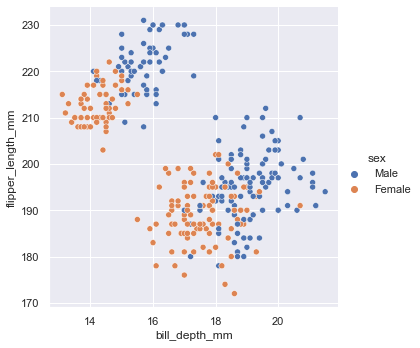

In [9]:
sns.relplot(x = "bill_depth_mm", y = "flipper_length_mm", hue = "sex", data = penguins)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt # just to format confusion matrix

In [11]:
# process data
penguins['sex'] = penguins['sex'].replace(to_replace=['Male', 'Female'], value=[0, 1])
target = penguins['sex'].values
data = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

In [12]:
logistic_model = LogisticRegression()
logistic_model.fit(X = data, y = target)
penguins["predicted"] = logistic_model.predict(data)

accuracy is 0.9099099099099099


/Users/lindatang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


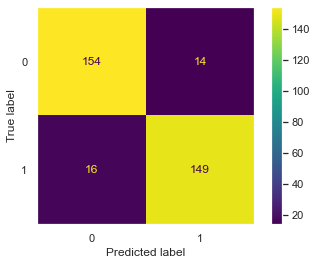

In [13]:
score = logistic_model.score(data, target)
print(f'accuracy is {score}') # accuracy score
plot_confusion_matrix(logistic_model, data, target)
plt.grid(False)

/Users/lindatang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


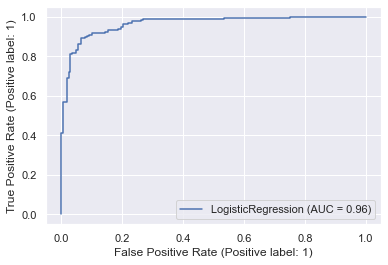

In [14]:
plot_roc_curve(logistic_model, data, target) 